In [70]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [84]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
from calendar import month_abbr
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_regression
from sklearn import preprocessing
import seaborn as sns

In [85]:
df = pd.read_csv('~/forestfires.csv')

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [86]:
df['label'] = np.where(df['area'] > 0, 0, 1)

df = df.drop('area', axis=1)

In [87]:
lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
df['month'] = df['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [88]:
dict = {
    "sun": 1,
    "mon": 2,
    "tue": 3,
    "wed": 4,
    "thu": 5,
    "fri": 6,
    "sat": 7
}

df['day'] = df['day'].str.lower().map(lambda d: dict[d]).astype('Int8')

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


In [89]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['label'])
print(f"""
X shape: {X.shape}
y shape: {y.shape}
""")


X shape: (517, 12)
y shape: (517,)



In [90]:
def model_comparison(X, Y):
    """
    This function fits the data to a Huber Regessor and Linear Regression model.
    Outputs the coefficents, mean squared error, and coefficent of
    determination for each model fit and plots the raw data and fitted line.
    
    X: A (n_measurements, 1) shaped numpy array with temperature measurements
    Y: A (n_measurements,) shaped numpy array with resistance measurements
    material_name: a string describing the material; used in the plot title
    """
    linear_reg = LinearRegression().fit(X, Y)
    linear_ypred = linear_reg.predict(X)
    
    index = 0 
    for i in df.columns[:-1]:
        print(f"""
             {i} regression coefficient: {linear_reg.coef_[index]:.3f}
        """)
        index += 1

    
    print(f"""
    Linear regression MSE: {mean_squared_error(Y, linear_ypred):.3f}
    Linear regression coefficent of determination: {r2_score(Y, linear_ypred):.3f}
    """)
    
model_comparison(X,y)


             X regression coefficient: -0.011
        

             Y regression coefficient: -0.015
        

             month regression coefficient: -0.038
        

             day regression coefficient: 0.001
        

             FFMC regression coefficient: -0.004
        

             DMC regression coefficient: -0.000
        

             DC regression coefficient: 0.000
        

             ISI regression coefficient: 0.004
        

             temp regression coefficient: -0.006
        

             RH regression coefficient: -0.000
        

             wind regression coefficient: -0.021
        

             rain regression coefficient: -0.019
        

    Linear regression MSE: 0.241
    Linear regression coefficent of determination: 0.032
    


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 3)

In [113]:
clf = RandomForestClassifier(max_depth=50, n_estimators=100, max_features=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'Random forest mean accuracy: {score:.3f}')

Random forest mean accuracy: 0.620


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        87
           1       0.64      0.52      0.58        84

    accuracy                           0.62       171
   macro avg       0.62      0.62      0.62       171
weighted avg       0.62      0.62      0.62       171



<AxesSubplot:>

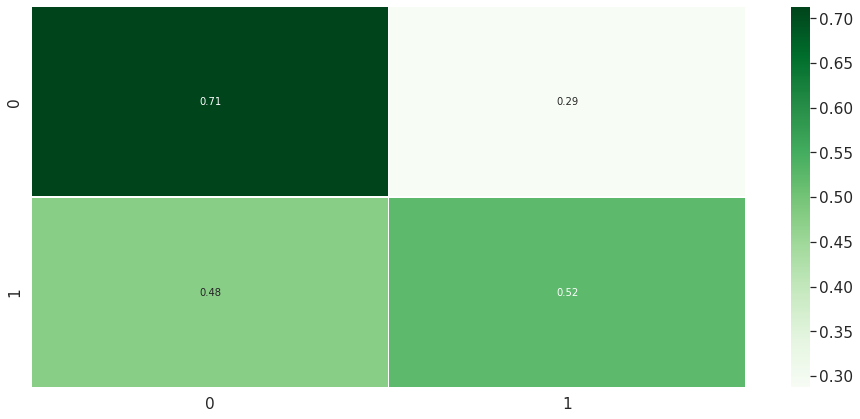

In [115]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)


In [ ]:
print(classification_report(y_test, y_pred))

In [117]:
clf = AdaBoostClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'AdaBoost mean accuracy: {score:.3f}')

AdaBoost mean accuracy: 0.544


In [118]:
clf = MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'MLP mean accuracy: {score:.3f}')

MLP mean accuracy: 0.591


In [119]:
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns[4:-1]:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,6,0.896050,0.089942,0.109575,0.090909,0.246246,0.51,0.712766,0.00000,1
1,7,4,10,3,0.941788,0.121524,0.777481,0.119430,0.540541,0.33,0.095745,0.00000,1
2,7,4,10,7,0.941788,0.150017,0.798164,0.119430,0.438438,0.33,0.138298,0.00000,1
3,8,6,3,6,0.953222,0.114315,0.090053,0.160428,0.249249,0.97,0.425532,0.03125,1
4,8,6,3,1,0.928274,0.176107,0.118754,0.171123,0.342342,0.99,0.191489,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,0.848233,0.194645,0.773414,0.033868,0.834835,0.32,0.287234,0.00000,0
513,2,4,8,1,0.848233,0.194645,0.773414,0.033868,0.657658,0.71,0.617021,0.00000,0
514,7,4,8,1,0.848233,0.194645,0.773414,0.033868,0.636637,0.70,0.712766,0.00000,0
515,1,4,8,7,0.981289,0.501202,0.714269,0.201426,0.768769,0.42,0.425532,0.00000,1


In [120]:
X = np.array(df_max_scaled[df_max_scaled.columns[:-1]])
y = np.array(df_max_scaled['label'])
print(f"""
X shape: {X.shape}
y shape: {y.shape}
""")


X shape: (517, 12)
y shape: (517,)



In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 3)

In [122]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'Random forest mean accuracy: {score:.3f}')

Random forest mean accuracy: 0.579


<AxesSubplot:>

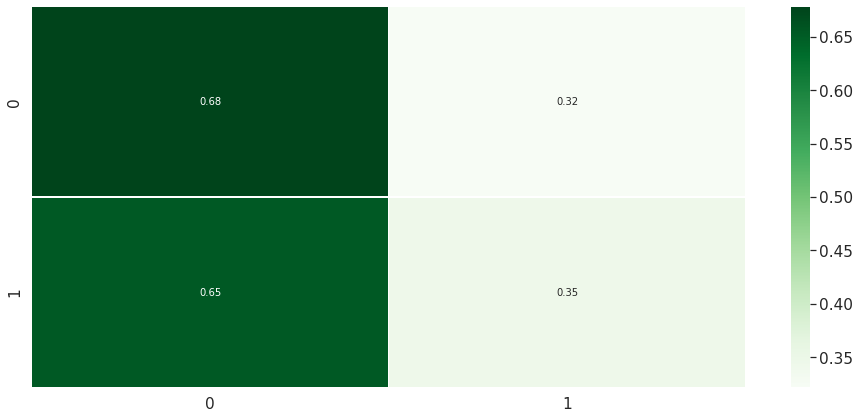

In [62]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        87
           1       0.64      0.52      0.58        84

    accuracy                           0.62       171
   macro avg       0.62      0.62      0.62       171
weighted avg       0.62      0.62      0.62       171



In [123]:
clf = AdaBoostClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'AdaBoost mean accuracy: {score:.3f}')

AdaBoost mean accuracy: 0.544


In [124]:
clf = MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'MLP mean accuracy: {score:.3f}')

MLP mean accuracy: 0.608


In [125]:
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns[4:-1]:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,1
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,1
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,1
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,1
4,8,6,3,1,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,0
513,2,4,8,1,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,0
514,7,4,8,1,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,0
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,1


In [126]:
X = np.array(df_z_scaled[df_z_scaled.columns[:-1]])
y = np.array(df_z_scaled['label'])
print(f"""
X shape: {X.shape}
y shape: {y.shape}
""")


X shape: (517, 12)
y shape: (517,)



In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 3)

In [128]:
clf = RandomForestClassifier(max_depth=10, n_estimators=20, max_features=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'Random forest mean accuracy: {score:.3f}')

Random forest mean accuracy: 0.620


<AxesSubplot:>

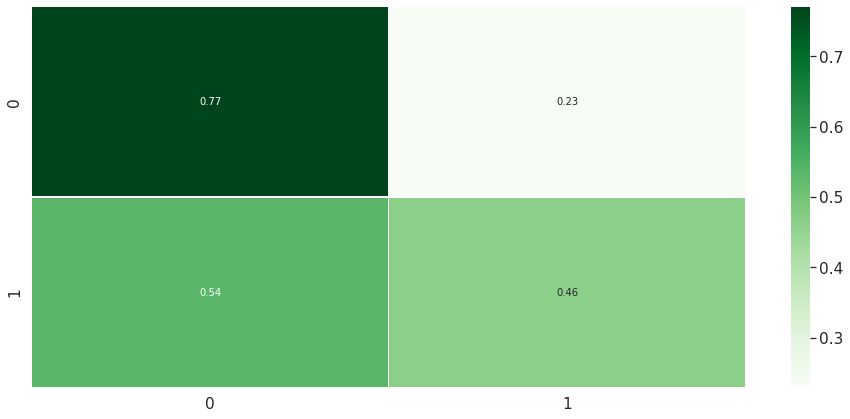

In [129]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [130]:
clf = AdaBoostClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'AdaBoost mean accuracy: {score:.3f}')

AdaBoost mean accuracy: 0.544


In [131]:
clf = MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print(f'MLP mean accuracy: {score:.3f}')

MLP mean accuracy: 0.561
